# **Assignment 1**


## Use skimage, the Python image preprocessing package, to convert pictures into numpy arrays. To begin, use from skimage import data and then something like image = data.coins() to have the matrix corresponding to the b/w picture of a set of coins arranged on a dark surface (this is a small dataset that is made availableby skimage).

In [ ]:
!pip install numpy scikit-image matplotlib
import numpy as np
from skimage import data
import matplotlib.pyplot as plt

### Let image be the matrix of the b/w picture of a set of coins arranged on a dark surface.

In [ ]:
image = data.coins()
image

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

### Let's perform the Singular Value Decompostion of the matrix of the image. We have:

*   **$U$**: Left singular vectors matrix
*   **$S$**: Singular values array
*   **$V^T$**: Transpose of the right singular vectors matrix   


In [ ]:
U, S, V_t = np.linalg.svd(image, full_matrices=False) # full_matrices=False doesn't calculate the unnecessary parts of the U and Vt matrices,
# making the computation more efficien

### Reconstruct the images using the 5%, 10%, 25%, 50% of the singular values. To do so, it is needed to approximate the original matrix in a lower rank matrix, in fact:
* **$U[:, :k]$**: first $k$ columns of the left singular vectors matrix $U$. These columns correspond to the most significant directions in the input space.
* **$np.dot(np.diag(S[:k])$**: diagonal matrix using the first $k$ singular values from the array $S$ which represents the importance of each singular value.
* **$V^T[:k, :]$**: first $k$ rows of the transpose of the right singular vectors matrix $V^T$ which correspond to the most significant directions in the output space.

## Then, use matplotlib to print the picture corresponding to the matrices.


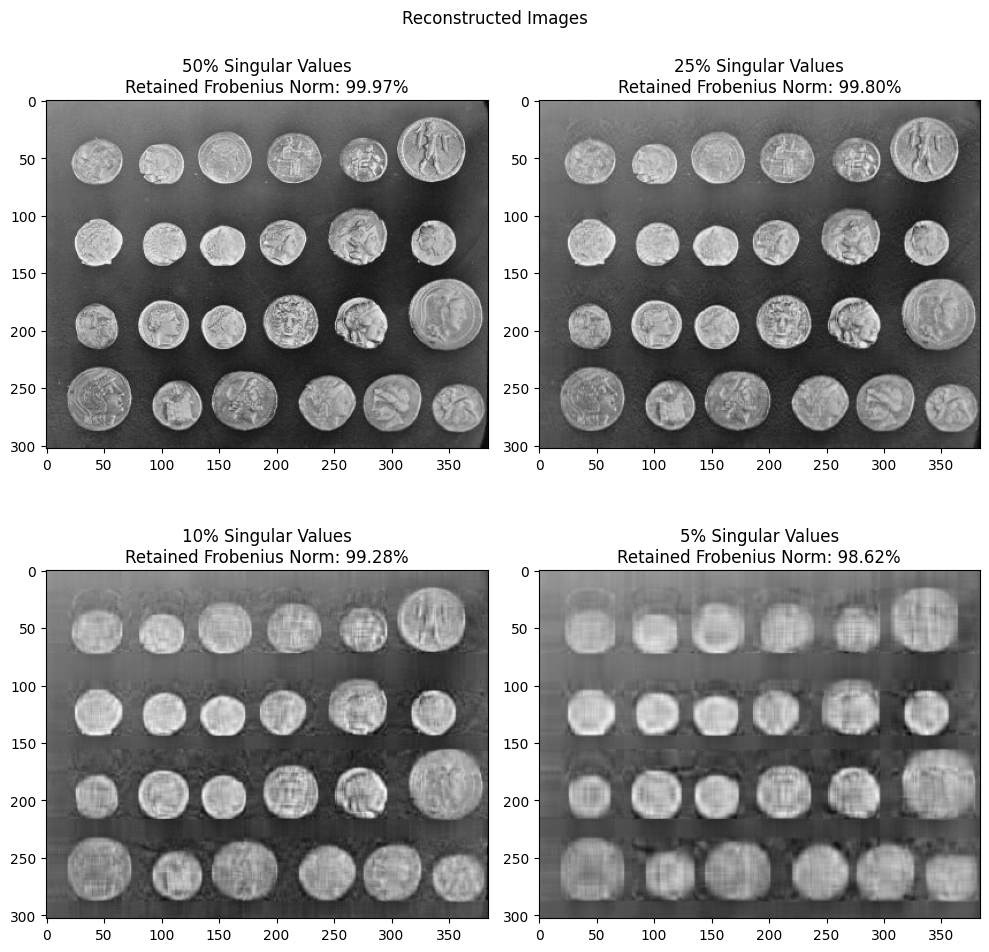

In [ ]:
p = [50, 25, 10, 5] # Singular values percentages

# Set up a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('Reconstructed Images')

for i, p in enumerate(p):
    # Calculate the number of singular values to retain for each percentage
    k = int((p / 100 * min(image.shape)))
    approx_image = np.dot(U[:, :k], np.dot(np.diag(S[:k]), V_t[:k, :]))

    # Compute the Frobenius norm of both the original and reconstructed image matrices and the percentage retained.
    original_norm = np.linalg.norm(image, 'fro')
    rec_norm = np.linalg.norm(approx_image, 'fro')
    ret_p = (rec_norm / original_norm) * 100

    # Plot the reconstructed image in the i-th subplot
    ax = axes[i // 2, i % 2]
    ax.imshow(approx_image, cmap='gray')
    ax.set_title(f'{p}% Singular Values\nRetained Frobenius Norm: {ret_p:.2f}%')

# Better visualization
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()